<a href="https://colab.research.google.com/github/Yoge2003/DS_Assignment-/blob/main/DS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Data Pre-Processing

Formatting date/time in sentiment_df

In [ ]:
sentiment_df = pd.read_csv("/fear_greed_index.csv")

sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'],
    dayfirst=True
)
sentiment_df.info()

sentiment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Formatting date/time on trader_df. creating new column for date and separate column for time

In [ ]:
trader_df = pd.read_csv("/historical_data.csv")

trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    dayfirst=True
)
trader_df['date'] =trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

trader_df.info()
trader_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


Handling Missing values on both datasets


In [ ]:
trader_df.isnull().sum()
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


# Data Intergration

Merging Both Datasets

In [ ]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


# Sentiment Grouping

In [ ]:
merged_df['sentiment_group'] = merged_df['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)

merged_df['sentiment_group'].value_counts()

merged_df[['classification', 'sentiment_group']].head()


,classification,sentiment_group
0,Extreme Greed,Greed
1,Extreme Greed,Greed
2,Extreme Greed,Greed
3,Extreme Greed,Greed
4,Extreme Greed,Greed


# Profitability Analysis

In [ ]:
profit_stats = (
    merged_df
    .groupby('sentiment_group')['Closed PnL']
    .agg(
        avg_pnl='mean',
        median_pnl='median'
    )
)

profit_stats


,avg_pnl,median_pnl
sentiment_group,,
Fear,49.212077,0.0
Greed,48.118246,0.0


In [ ]:
profit_percentage = (
    merged_df
    .assign(is_profitable = merged_df['Closed PnL'] > 0)
    .groupby('sentiment_group')['is_profitable']
    .mean() * 100
)

profit_percentage


,is_profitable
sentiment_group,
Fear,40.787150
Greed,41.344418


In [ ]:
avg_loss = (
    merged_df[merged_df['Closed PnL'] < 0]
    .groupby('sentiment_group')['Closed PnL']
    .mean()
)

avg_loss


,Closed PnL
sentiment_group,
Fear,-196.346650
Greed,-152.449801


In [ ]:
profitability_summary = profit_stats.copy()

profitability_summary['profitable_trade_%'] = profit_percentage
profitability_summary['avg_loss'] = avg_loss

profitability_summary


,avg_pnl,median_pnl,profitable_trade_%,avg_loss
sentiment_group,,,,
Fear,49.212077,0.0,40.787150,-196.346650
Greed,48.118246,0.0,41.344418,-152.449801


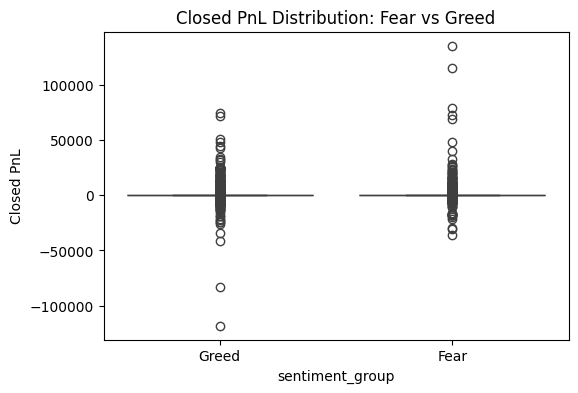

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged_df,
    x='sentiment_group',
    y='Closed PnL'
)
plt.title('Closed PnL Distribution: Fear vs Greed')
plt.show()


# Volume Analysis

In [ ]:
avg_trade_size = (
    merged_df
    .groupby('sentiment_group')['Size USD']
    .mean()
)

avg_trade_size


,Size USD
sentiment_group,
Fear,7182.011019
Greed,4635.764077


In [ ]:
total_volume = (
    merged_df
    .groupby('sentiment_group')['Size USD']
    .sum()
)

total_volume


,Size USD
sentiment_group,
Fear,5.978091e+08
Greed,5.932897e+08


In [ ]:
trade_count = (
    merged_df
    .groupby('sentiment_group')
    .size()
)

trade_count


,0
sentiment_group,
Fear,83237
Greed,127981


In [ ]:
volume_summary = (
    merged_df
    .groupby('sentiment_group')
    .agg(
        avg_trade_size_usd=('Size USD', 'mean'),
        total_volume_usd=('Size USD', 'sum'),
        number_of_trades=('Size USD', 'count')
    )
)

volume_summary


,avg_trade_size_usd,total_volume_usd,number_of_trades
sentiment_group,,,
Fear,7182.011019,5.978091e+08,83237
Greed,4635.764077,5.932897e+08,127981


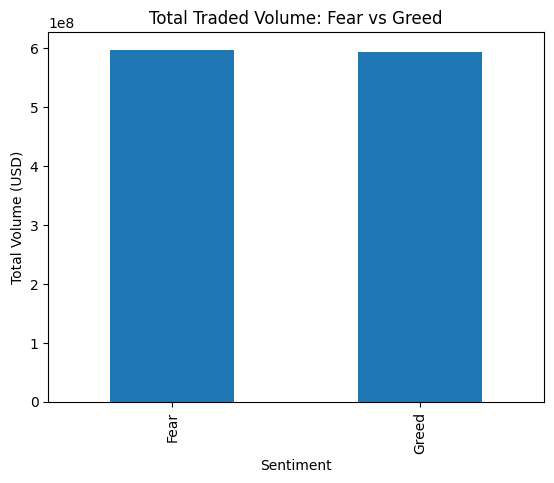

In [ ]:
import matplotlib.pyplot as plt

volume_summary['total_volume_usd'].plot(
    kind='bar',
    title='Total Traded Volume: Fear vs Greed',
    ylabel='Total Volume (USD)',
    xlabel='Sentiment'
)

plt.show()


# Risk Behavior Analysis

In [ ]:
avg_position_size = (
    merged_df
    .groupby('sentiment_group')['Size USD']
    .mean()
)

avg_position_size


,Size USD
sentiment_group,
Fear,7182.011019
Greed,4635.764077


In [ ]:
max_position_size = (
    merged_df
    .groupby('sentiment_group')['Size USD']
    .max()
)

max_position_size


,Size USD
sentiment_group,
Fear,3921430.72
Greed,3641180.84


In [ ]:
position_variability = (
    merged_df
    .groupby('sentiment_group')['Size USD']
    .std()
)

position_variability


,Size USD
sentiment_group,
Fear,46166.17438
Greed,28620.29323


In [ ]:
risk_summary = (
    merged_df
    .groupby('sentiment_group')
    .agg(
        avg_position_usd=('Size USD', 'mean'),
        max_position_usd=('Size USD', 'max'),
        position_size_std=('Size USD', 'std')
    )
)

risk_summary


,avg_position_usd,max_position_usd,position_size_std
sentiment_group,,,
Fear,7182.011019,3921430.72,46166.17438
Greed,4635.764077,3641180.84,28620.29323


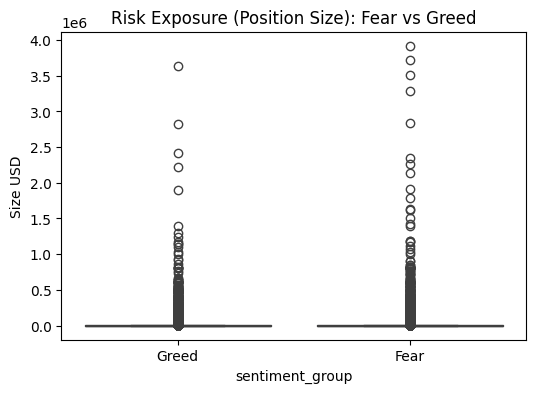

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged_df,
    x='sentiment_group',
    y='Size USD'
)
plt.title('Risk Exposure (Position Size): Fear vs Greed')
plt.show()
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/Size USD VS Sentiment Group.png",
    bbox_inches='tight')

# Fee VS Sentiment

In [ ]:
avg_fee = (
    merged_df
    .groupby('sentiment_group')['Fee']
    .mean()
)

avg_fee


,Fee
sentiment_group,
Fear,1.397763
Greed,1.011897


In [ ]:
total_fee = (
    merged_df
    .groupby('sentiment_group')['Fee']
    .sum()
)

total_fee


,Fee
sentiment_group,
Fear,116345.582614
Greed,129503.625748


In [ ]:
trade_count = (
    merged_df
    .groupby('sentiment_group')
    .size()
)

trade_count


,0
sentiment_group,
Fear,83237
Greed,127981


In [ ]:
fee_summary = (
    merged_df
    .groupby('sentiment_group')
    .agg(
        avg_fee_per_trade=('Fee', 'mean'),
        total_fee_paid=('Fee', 'sum'),
        number_of_trades=('Fee', 'count')
    )
)

fee_summary


,avg_fee_per_trade,total_fee_paid,number_of_trades
sentiment_group,,,
Fear,1.397763,116345.582614,83237
Greed,1.011897,129503.625748,127981


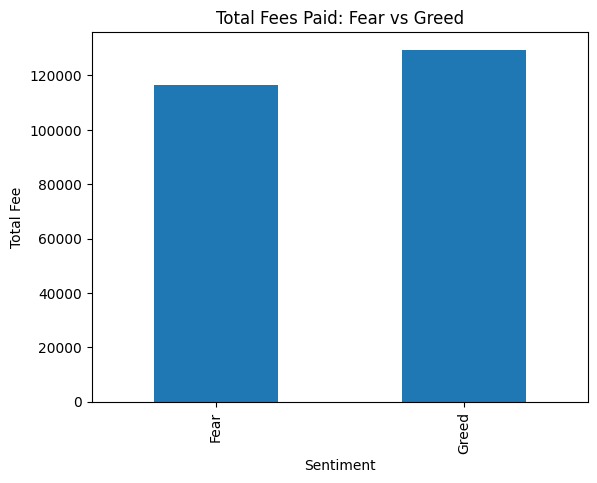

In [ ]:
import matplotlib.pyplot as plt

fee_summary['total_fee_paid'].plot(
    kind='bar',
    title='Total Fees Paid: Fear vs Greed',
    ylabel='Total Fee',
    xlabel='Sentiment'
)

plt.show()


# LOSS FOCUSED ANALYSIS

In [ ]:
loss_df = merged_df[merged_df['Closed PnL'] < 0]


In [ ]:
avg_loss = (
    loss_df
    .groupby('sentiment_group')['Closed PnL']
    .mean()
)

avg_loss


,Closed PnL
sentiment_group,
Fear,-196.346650
Greed,-152.449801


In [ ]:
worst_loss = (
    loss_df
    .groupby('sentiment_group')['Closed PnL']
    .min()
)

worst_loss


,Closed PnL
sentiment_group,
Fear,-35681.74723
Greed,-117990.10410


In [ ]:
large_loss_threshold = -500
large_loss_freq = (
    loss_df[loss_df['Closed PnL'] <= large_loss_threshold]
    .groupby('sentiment_group')
    .size()
)


In [ ]:
total_trades = merged_df.groupby('sentiment_group').size()

large_loss_percentage = (large_loss_freq / total_trades) * 100

large_loss_percentage


,0
sentiment_group,
Fear,0.535819
Greed,0.361772


In [ ]:
loss_summary = (
    loss_df
    .groupby('sentiment_group')
    .agg(
        avg_loss=('Closed PnL', 'mean'),
        worst_loss=('Closed PnL', 'min'),
        loss_count=('Closed PnL', 'count')
    )
)

loss_summary['large_loss_%'] = large_loss_percentage

loss_summary


,avg_loss,worst_loss,loss_count,large_loss_%
sentiment_group,,,,
Fear,-196.346650,-35681.74723,6264,0.535819
Greed,-152.449801,-117990.10410,11275,0.361772


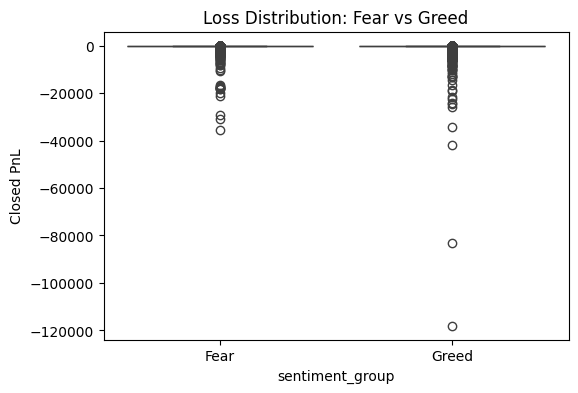

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    data=loss_df,
    x='sentiment_group',
    y='Closed PnL'
)
plt.title('Loss Distribution: Fear vs Greed')
plt.show()


# DIRECTIONAL BIAS CODE

In [ ]:
direction_count = (
    merged_df
    .groupby(['sentiment_group', 'Side'])
    .size()
    .unstack(fill_value=0)
)

direction_count


Side,BUY,SELL
sentiment_group,,
Fear,41205,42032
Greed,61485,66496


In [ ]:
direction_percentage = (
    direction_count
    .div(direction_count.sum(axis=1), axis=0) * 100
)

direction_percentage


Side,BUY,SELL
sentiment_group,,
Fear,49.503226,50.496774
Greed,48.042288,51.957712


In [ ]:
direction_profitability = (
    merged_df
    .groupby(['sentiment_group', 'Side'])['Closed PnL']
    .mean()
    .unstack()
)

direction_profitability


Side,BUY,SELL
sentiment_group,,
Fear,56.015456,42.542558
Greed,22.074041,72.199814


In [ ]:
profitable_direction = (
    merged_df
    .assign(is_profitable = merged_df['Closed PnL'] > 0)
    .groupby(['sentiment_group', 'Side'])['is_profitable']
    .mean()
    .unstack() * 100
)

profitable_direction


Side,BUY,SELL
sentiment_group,,
Fear,24.671763,56.585459
Greed,29.205497,52.568576


In [ ]:
directional_summary = (
    merged_df
    .groupby(['sentiment_group', 'Side'])
    .agg(
        trade_count=('Closed PnL', 'count'),
        avg_pnl=('Closed PnL', 'mean'),
        profitable_trade_pct=('Closed PnL', lambda x: (x > 0).mean() * 100)
    )
    .reset_index()
)

directional_summary


,sentiment_group,Side,trade_count,avg_pnl,profitable_trade_pct
0,Fear,BUY,41205,56.015456,24.671763
1,Fear,SELL,42032,42.542558,56.585459
2,Greed,BUY,61485,22.074041,29.205497
3,Greed,SELL,66496,72.199814,52.568576


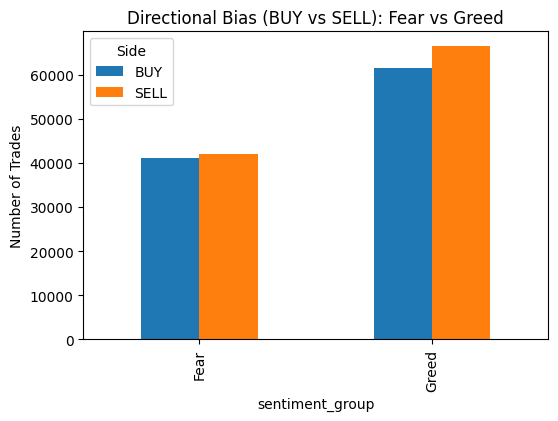

In [ ]:
direction_count.plot(
    kind='bar',
    figsize=(6,4),
    title='Directional Bias (BUY vs SELL): Fear vs Greed',
    ylabel='Number of Trades'
)
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/Directional Bias (BUY vs SELL): fear vs greed.png",
    bbox_inches='tight')

# TIME-BASED BEHAVIOR

In [ ]:
merged_df['hour'] = merged_df['Timestamp IST'].dt.hour


In [ ]:
trades_per_hour = (
    merged_df
    .groupby(['sentiment_group', 'hour'])
    .size()
    .reset_index(name='trade_count')
)

trades_per_hour.head()


,sentiment_group,hour,trade_count
0,Fear,0,3902
1,Fear,1,3855
2,Fear,2,2228
3,Fear,3,3611
4,Fear,4,4598


In [ ]:
trades_per_hour_pivot = (
    trades_per_hour
    .pivot(index='hour', columns='sentiment_group', values='trade_count')
    .fillna(0)
)

trades_per_hour_pivot


sentiment_group,Fear,Greed
hour,,
0,3902,5954
1,3855,6626
2,2228,5953
3,3611,6913
4,4598,5411
5,4097,5441
6,4259,4798
7,4503,4082
8,3428,4420


In [ ]:
hourly_profitability = (
    merged_df
    .groupby(['sentiment_group', 'hour'])['Closed PnL']
    .mean()
    .reset_index()
)

hourly_profitability.head()


,sentiment_group,hour,Closed PnL
0,Fear,0,25.307187
1,Fear,1,110.901919
2,Fear,2,91.049080
3,Fear,3,52.701735
4,Fear,4,22.279057


In [ ]:
hourly_profit_pivot = (
    hourly_profitability
    .pivot(index='hour', columns='sentiment_group', values='Closed PnL')
)

hourly_profit_pivot


sentiment_group,Fear,Greed
hour,,
0,25.307187,54.804143
1,110.901919,14.438836
2,91.049080,12.930794
3,52.701735,39.015566
4,22.279057,63.288948
5,32.010397,46.823508
6,26.599711,38.649977
7,120.665270,41.506275
8,101.400691,25.913813


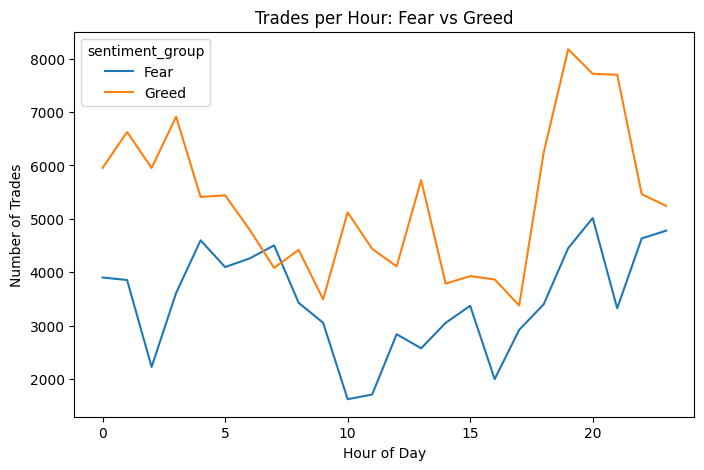

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

trades_per_hour_pivot.plot(
    figsize=(8,5),
    title='Trades per Hour: Fear vs Greed',
    ylabel='Number of Trades',
    xlabel='Hour of Day'
)

plt.show()
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/trades per hour: FEAR VS GREED.png",
    bbox_inches='tight')

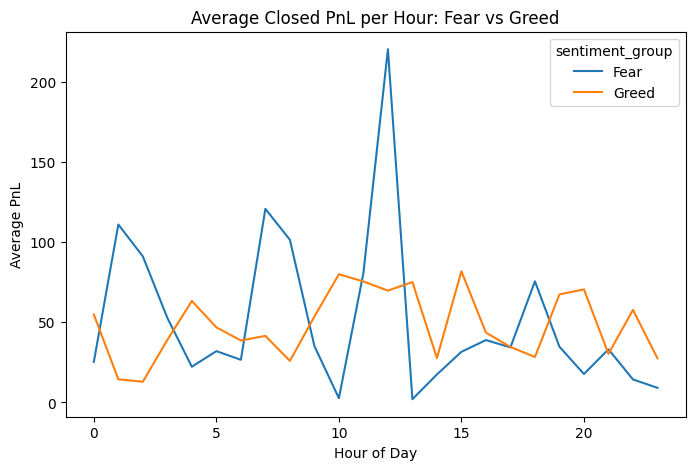

<Figure size 640x480 with 0 Axes>

In [ ]:
hourly_profit_pivot.plot(
    figsize=(8,5),
    title='Average Closed PnL per Hour: Fear vs Greed',
    ylabel='Average PnL',
    xlabel='Hour of Day'
)

plt.show()
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/avg pnl per hour.png",
    bbox_inches='tight')

# VISUALIZATION

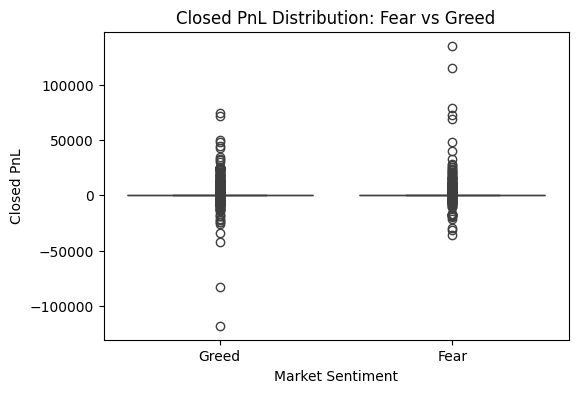

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged_df,
    x='sentiment_group',
    y='Closed PnL'
)
plt.title('Closed PnL Distribution: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()

plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/closed_pnl_vs_market_sentiment.png",
    bbox_inches='tight')

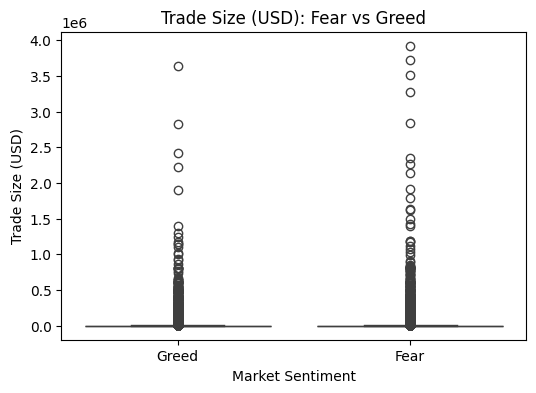

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged_df,
    x='sentiment_group',
    y='Size USD'
)
plt.title('Trade Size (USD): Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.show()
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/trade_size VS Market_sentiment.png",
    bbox_inches='tight')

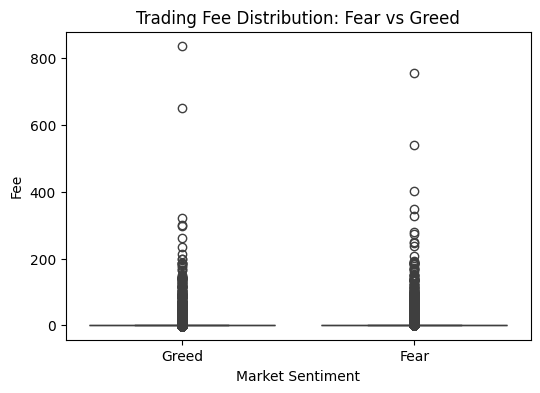

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged_df,
    x='sentiment_group',
    y='Fee'
)
plt.title('Trading Fee Distribution: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Fee')
plt.show()
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/FEE VS Market_Sentiment.png",
    bbox_inches='tight')

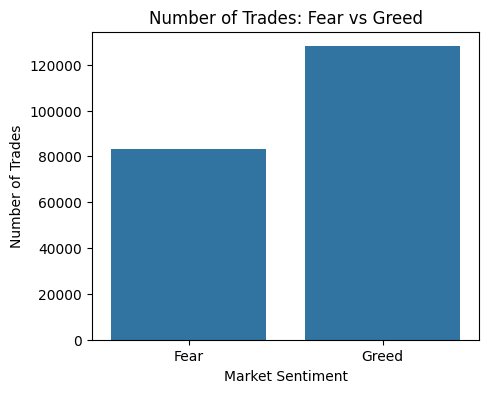

<Figure size 640x480 with 0 Axes>

In [ ]:
trade_count = (
    merged_df
    .groupby('sentiment_group')
    .size()
    .reset_index(name='trade_count')
)

plt.figure(figsize=(5,4))
sns.barplot(
    data=trade_count,
    x='sentiment_group',
    y='trade_count'
)
plt.title('Number of Trades: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()
plt.savefig(
    "DS_P N Yogeswaran/OUTPUTS/Number_OF_Trades VS Market_Sentiment.png",
    bbox_inches='tight')

# SMART TRADING SIGNAL EXTRACTION

In [ ]:
summary_metrics = (
    merged_df
    .groupby('sentiment_group')
    .agg(
        avg_pnl=('Closed PnL', 'mean'),
        avg_trade_size=('Size USD', 'mean'),
        total_volume=('Size USD', 'sum'),
        avg_fee=('Fee', 'mean'),
        trade_count=('Closed PnL', 'count'),
        loss_rate=('Closed PnL', lambda x: (x < 0).mean())
    )
)

summary_metrics


,avg_pnl,avg_trade_size,total_volume,avg_fee,trade_count,loss_rate
sentiment_group,,,,,,
Fear,49.212077,7182.011019,5.978091e+08,1.397763,83237,0.075255
Greed,48.118246,4635.764077,5.932897e+08,1.011897,127981,0.088099


In [ ]:
if summary_metrics.loc['Greed', 'avg_trade_size'] > summary_metrics.loc['Fear', 'avg_trade_size']:
    signal_1 = "Reduce position size during Greed as traders take larger and riskier positions."
else:
    signal_1 = "Position size remains controlled across sentiments."


In [ ]:
if summary_metrics.loc['Greed', 'trade_count'] > summary_metrics.loc['Fear', 'trade_count']:
    signal_2 = "Control trade frequency during Greed to avoid overtrading and excess fees."
else:
    signal_2 = "Trade frequency is balanced across sentiments."


In [ ]:
if summary_metrics.loc['Greed', 'loss_rate'] > summary_metrics.loc['Fear', 'loss_rate']:
    signal_3 = "Higher loss frequency during Greed suggests emotional trading and weaker risk management."
else:
    signal_3 = "Loss frequency does not significantly increase during Greed."


In [ ]:
if summary_metrics.loc['Greed', 'avg_fee'] > summary_metrics.loc['Fear', 'avg_fee']:
    signal_4 = "Higher fees during Greed indicate that overactivity is reducing net profitability."
else:
    signal_4 = "Fee impact is similar across sentiments."


In [ ]:
risk_adjusted_return = (
    summary_metrics['avg_pnl'] / summary_metrics['avg_trade_size']
)

risk_adjusted_return
if risk_adjusted_return['Greed'] < risk_adjusted_return['Fear']:
    signal_5 = "Fear periods offer better risk-adjusted returns despite lower absolute profits."
else:
    signal_5 = "Greed periods provide competitive risk-adjusted returns."


In [ ]:
trading_signals = [
    signal_1,
    signal_2,
    signal_3,
    signal_4,
    signal_5
]

for i, s in enumerate(trading_signals, start=1):
    print(f"Signal {i}: {s}")


Signal 1: Position size remains controlled across sentiments.
Signal 2: Control trade frequency during Greed to avoid overtrading and excess fees.
Signal 3: Higher loss frequency during Greed suggests emotional trading and weaker risk management.
Signal 4: Fee impact is similar across sentiments.
Signal 5: Greed periods provide competitive risk-adjusted returns.


In [ ]:
merged_df.to_csv(
    "DS_P N Yogeswaran/CSV_FILES/processed_trader_sentiment_data.csv",
    index=False
)